# SSVEP Project Overview

Steady-State Visually Evoked Potentials (SSVEP) are brain responses to visual stimuli that flicker at specific frequencies. Analyzing SSVEPs is crucial in various fields, including neuroscience, brain-computer interfaces (BCIs), and cognitive psychology. In this project, I perform SSVEP analysis, including temporal and frequency analysis, compare Signal-to-Noise Ratio (SNR), and visualize the results.

## Features

- **Frequency Analysis:** Extract and analyze frequency components related to SSVEPs.
- **Visualization:** Generate plots to visualize SSVEP responses and patterns.

## Data Used

This project utilizes a single-subject dataset collected in the Lab for Neuroergonomics (LFNE) at National Sun Yat-Sen University (Kaohsiung, Taiwan). Current dataset was preprocessed in **EEGlab**, was downsampled to 250 Hz (from 1000 Hz) and bandpass filtered to 5-30 Hz to preserve representative frequencies only. The dataset includes:

- **Electrodes:** Data recorded from 30 electrodes placed according to the 10/20 international electrode placement system.
- **Stimuli Frequencies:** The experiment is designed to analyze the efficiency of different frequency stimulations for use in SSVEP paradigms in BCI implementations. The stimulation frequencies include 6, 8, 10, 12, 14, 20, 25, and 30 Hz.
- **Experimental Conditions:** Each trial lasts 4 seconds, with 4-second breaks between trials. There are approximately 20 trials for each stimulation frequency. Note that since the dataset was recorded within LFNE, it is not included in the current repository.


Extracting parameters from c:\Users\xiaom\OneDrive\Documents\Projects for github\SSVEP stimulation and analysis\S2Analysis\SSVEP python analysis\Subject 14 5 sessions filtered.set...


Not setting metadata
177 matching events found
No baseline correction applied
0 projection items activated
Ready.
EEG data loaded successfully from Subject 14 5 sessions filtered.set.
EEG Data Information:
<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, FZ, F4, F8, FT7, FC3, FCZ, FC4, FT8, T3, C3, ...
 chs: 30 EEG
 custom_ref_applied: False
 dig: 33 items (3 Cardinal, 30 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 30
 projs: []
 sfreq: 250.0 Hz
>

First 5 Events:
[[   1    0    1]
 [1001    0    2]
 [2001    0    3]
 [3001    0    4]
 [4001    0    5]]
Standard montage 'standard_1005' created.
Data Channels: ['FP1', 'FP2', 'F7', 'F3', 'FZ', 'F4', 'F8', 'FT7', 'FC3', 'FCZ', 'FC4', 'FT8', 'T3', 'C3', 'CZ', 'C4', 'T4', 'TP7', 'CP3', 'CPZ', 'CP4', 'TP8', 'T5', 'P3', 'PZ', 'P4', 'T6', 'O1', 'OZ', 'O2']
Montage Channels: ['Fp1', 'Fpz', 'Fp2', 'AF9', 'AF7', 'AF5', 'AF3', 'AF1', 'AFz', 'AF2', 'AF4', 'AF6', 'AF8', 'AF10', 'F9', 'F7', 'F5', 'F3', '

C:\Users\xiaom\AppData\Local\Temp\ipykernel_15372\95703085.py:17: RuntimeWarning: Data file name in EEG.data (Jason1234530filt.fdt) is incorrect, the file name must have changed on disk, using the correct file name (Subject 14 5 sessions filtered.fdt).
  epochs = mne.io.read_epochs_eeglab(file_path)


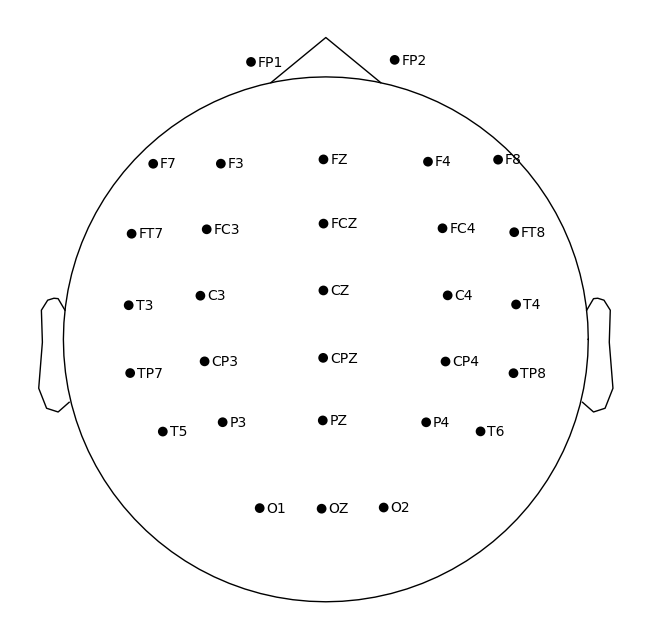

Sensor plot generated.

Event Information:
[[   1    0    1]
 [1001    0    2]
 [2001    0    3]
 [3001    0    4]
 [4001    0    5]]
Unique Event IDs: [1 2 3 4 5 6 7 8 9]


In [165]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from typing import List

def load_eeg_data(file_path: str) -> mne.Epochs:
    """
    Load EEG data from an EEGLAB .set file.

    Parameters:
    - file_path (str): Path to the .set file.

    Returns:
    - epochs (mne.Epochs): Loaded EEG epochs.
    """
    try:
        epochs = mne.io.read_epochs_eeglab(file_path)
        print(f"EEG data loaded successfully from {file_path}.")
        return epochs
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        raise
    except Exception as e:
        print(f"An error occurred while loading data: {e}")
        raise


def verify_data_structure(epochs: mne.Epochs) -> None:
    """
    Print information about the EEG epochs data structure.

    Parameters:
    - epochs (mne.Epochs): The EEG epochs to inspect.
    """
    print("EEG Data Information:")
    print(epochs.info)
    print("\nFirst 5 Events:")
    print(epochs.events[:5])


def setup_montage(epochs: mne.Epochs, montage_name: str = 'standard_1005') -> mne.Epochs:
    """
    Set up and apply a standard montage to the EEG data.

    Parameters:
    - epochs (mne.Epochs): The EEG epochs to set montage for.
    - montage_name (str): Name of the standard montage to use.

    Returns:
    - epochs (mne.Epochs): EEG epochs with the applied montage.
    """
    try:
        montage = mne.channels.make_standard_montage(montage_name)
        print(f"Standard montage '{montage_name}' created.")
    except ValueError as e:
        print(f"Error creating montage: {e}")
        raise

    print("Data Channels:", epochs.info['ch_names'])
    print("Montage Channels:", montage.ch_names)

    epochs.set_montage(montage, match_case=False)
    print("Montage set for EEG data.")

    return epochs


def plot_sensors(epochs: mne.Epochs, show_names: bool = True) -> None:
    """
    Plot the sensor locations to verify montage setup.

    Parameters:
    - epochs (mne.Epochs): The EEG epochs with montage set.
    - show_names (bool): Whether to display channel names.
    """
    try:
        epochs.plot_sensors(show_names=show_names)
        print("Sensor plot generated.")
    except Exception as e:
        print(f"An error occurred while plotting sensors: {e}")
        raise


def print_event_information(epochs: mne.Epochs) -> None:
    """
    Print event information from the EEG epochs.

    Parameters:
    - epochs (mne.Epochs): The EEG epochs containing event information.
    """
    print("\nEvent Information:")
    print(epochs.events[:5])
    unique_event_ids = np.unique(epochs.events[:, 2])
    print(f"Unique Event IDs: {unique_event_ids}")

# Define the file path to your EEG data
file_path = 'Subject 14 5 sessions filtered.set'

# Load EEG data using the defined function
epochs = load_eeg_data(file_path)

# Verify the structure of the loaded data
verify_data_structure(epochs)

# Set up the standard montage
epochs = setup_montage(epochs, montage_name='standard_1005')

# Verify montage setup by plotting sensor locations
plot_sensors(epochs, show_names=True)

# Print detailed event information
print_event_information(epochs)

### Visual Inspection of Average EEG Profiles

Before quantifying the results, we can take a look at the average profile of each stimulation frequency trial. Based on the literature, we can expect to see periodic responses in occipital area channels, and no periodic response in other areas. To compare and contrast, the analysis is provided for **Oz** and **Fz** channels. As seen in the plot, there is indeed a periodic pattern for Oz and not Fz, and no periodic structure for no stimulation trials.


Original event mapping: {'7': 1, '9': 2, '1': 3, '8': 4, '4': 5, '6': 6, '5': 7, '3': 8, '2': 9}


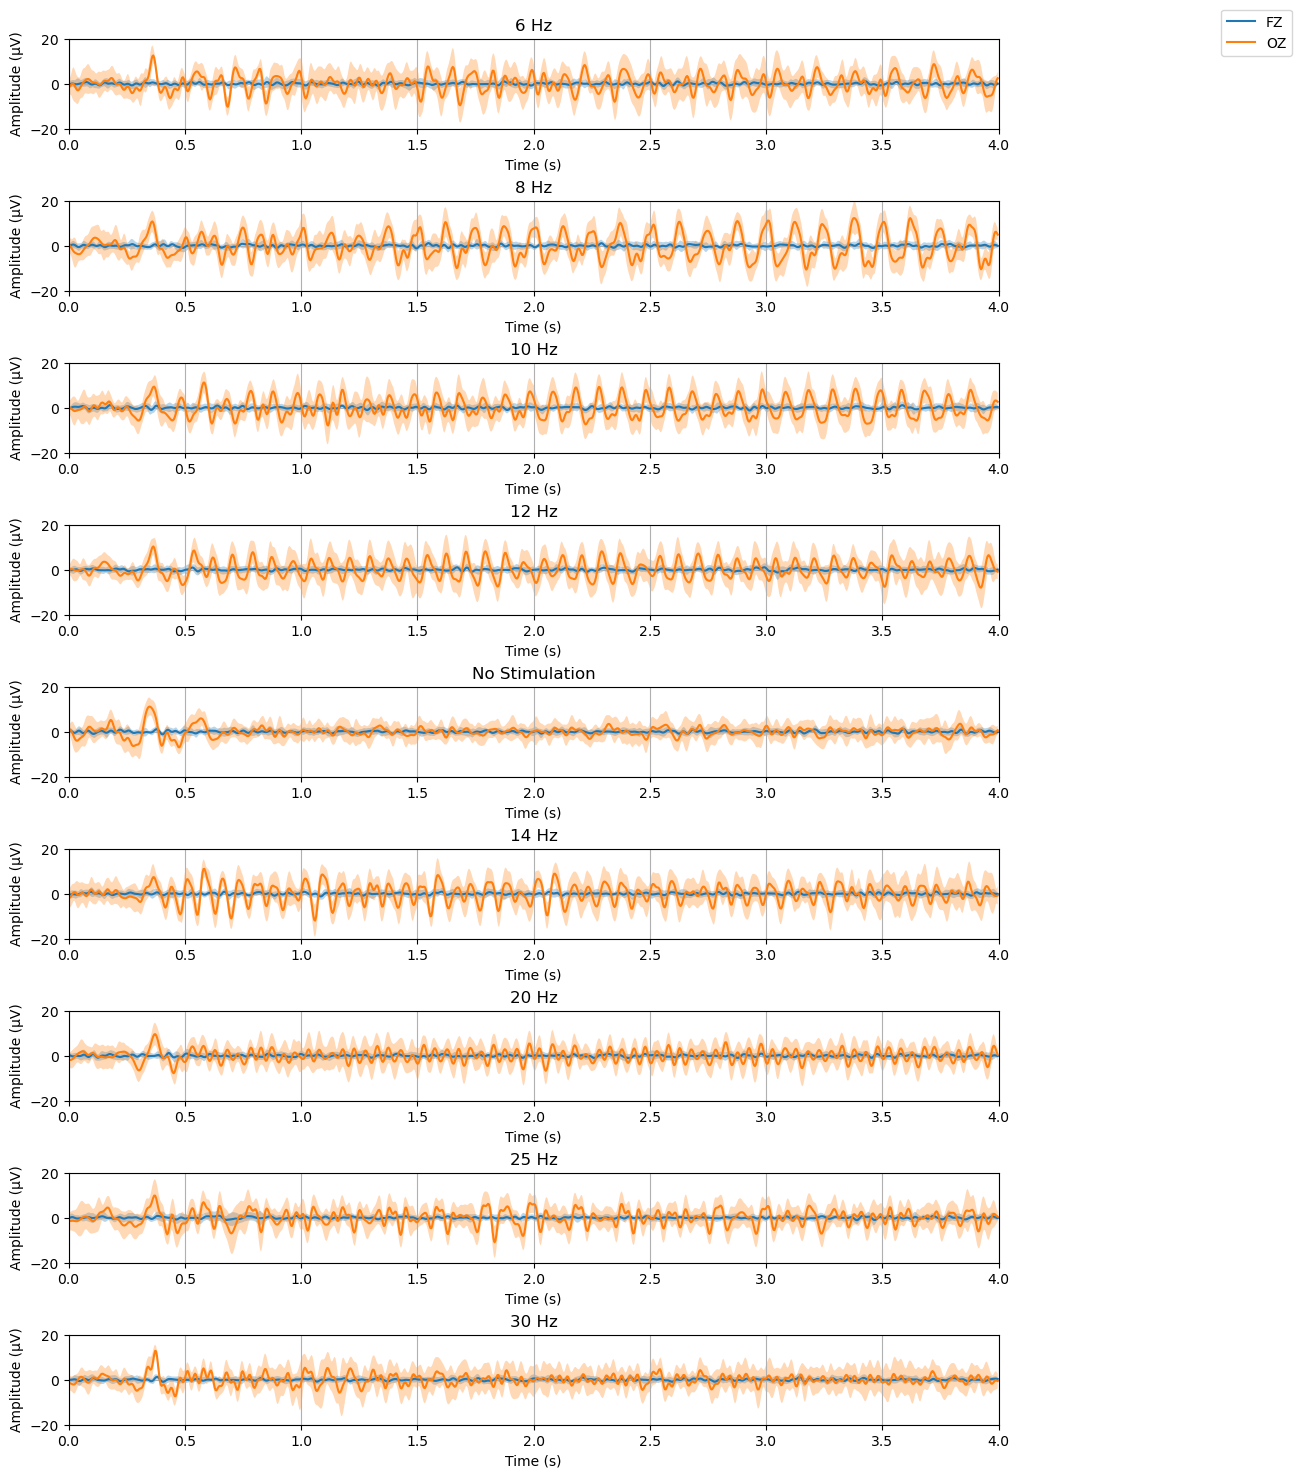

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict
import mne

def create_event_mapping(event_labels: List[str], epochs: mne.Epochs) -> Dict[str, int]:
    """
    Create a new ordered mapping of event labels to trigger codes.
    
    Parameters:
    - event_labels (List[str]): List of event labels in desired order.
    - epochs (mne.Epochs): The EEG epochs containing event information.
    
    Returns:
    - new_event_id (Dict[str, int]): New mapping of event labels to trigger codes.
    """
    print("Original event mapping:", epochs.event_id)
    sorted_triggers = sorted(epochs.event_id.keys(), key=lambda x: int(x))
    new_event_id = {label: int(trigger) for label, trigger in zip(event_labels, sorted_triggers)}
    return new_event_id

def get_event_order(epochs: mne.Epochs) -> List[str]:
    """
    Get a list of event keys in sorted order.
    
    Parameters:
    - epochs (mne.Epochs): The EEG epochs containing event information.
    
    Returns:
    - event_order (List[str]): Sorted list of event trigger codes as strings.
    """
    event_order = [str(trigger) for trigger in sorted(epochs.event_id.values())]
    return event_order

def get_channel_indices(epochs: mne.Epochs, channels: List[str]) -> Dict[str, int]:
    """
    Get the indices of specified channels in the EEG data.
    
    Parameters:
    - epochs (mne.Epochs): The EEG epochs containing channel information.
    - channels (List[str]): List of channel names to find indices for.
    
    Returns:
    - channel_indices (Dict[str, int]): Mapping of channel names to their indices.
    """
    channel_names = [name.upper() for name in epochs.info['ch_names']]
    channel_indices = {}
    for ch in channels:
        try:
            channel_indices[ch] = channel_names.index(ch.upper())
        except ValueError:
            print(f"Channel {ch} not found in data.")
            raise
    return channel_indices

def plot_eeg_channels(epochs: mne.Epochs, event_labels: List[str], sorted_triggers: List[str],
                      channel_indices: Dict[str, int], time_window: List[float]=[0,4],
                      amplitude_range: List[float]=[-20,20]) -> None:
    """
    Plot mean and standard deviation of specified EEG channels for each event type.
    
    Parameters:
    - epochs (mne.Epochs): The EEG epochs containing the data.
    - event_labels (List[str]): List of event labels in desired order.
    - sorted_triggers (List[str]): List of sorted trigger codes.
    - channel_indices (Dict[str, int]): Mapping of channel names to their indices.
    - time_window (List[float], optional): Time window for x-axis. Defaults to [0,4].
    - amplitude_range (List[float], optional): Amplitude range for y-axis. Defaults to [-20,20].
    """
    fig, axes = plt.subplots(nrows=len(event_labels), ncols=1, figsize=(12, 2 * len(event_labels)))
    plt.subplots_adjust(hspace=0.8)
    
    for idx, (label, trigger) in enumerate(zip(event_labels, sorted_triggers)):
        event_id = epochs.event_id[str(trigger)]
        data = epochs[str(trigger)].get_data() * 1e6  # Convert to µV
        
        ax = axes[idx]
        
        for ch_label, ch_idx in channel_indices.items():
            ch_mean = np.mean(data[:, ch_idx, :], axis=0)
            ch_std = np.std(data[:, ch_idx, :], axis=0)
            ax.plot(epochs.times, ch_mean, label=ch_label)
            ax.fill_between(epochs.times, ch_mean - ch_std, ch_mean + ch_std, alpha=0.3)
        
        ax.set(title=label, xlim=time_window, ylim=amplitude_range)
        ax.grid(True)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Amplitude (µV)')
    
    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.15, 0.9))
    plt.show()

# Define event labels in desired order
event_labels = ['6 Hz','8 Hz','10 Hz', '12 Hz', 'No Stimulation', '14 Hz',
               '20 Hz','25 Hz','30 Hz']

# Create new event mapping
new_event_id = create_event_mapping(event_labels, epochs)

# Get sorted triggers
sorted_triggers = sorted(epochs.event_id.keys(), key=lambda x: int(x))

# Get channel indices for 'FZ' and 'OZ'
channels_to_plot = ['FZ', 'OZ']
channel_indices = get_channel_indices(epochs, channels_to_plot)

# Plot EEG channels
plot_eeg_channels(epochs, event_labels, sorted_triggers, channel_indices)


### Spectral Analysis of SSVEP Responses

Ideally, in frequency analysis we will see response peaks at the same frequency as the stimulation, as well as harmonic frequencies (i.e., for 6 Hz stimulation, it would be 6, 12, 18, and 24 Hz), and not in other frequency bands. 

The resulting graph confirms the expectations. The strongest average response is for 8, 10, 12, and 14 Hz stimulation, which is in line with previous literature. At the same time, it is interesting that for 6 Hz stimulation, there is a stronger response in the second (12 Hz) and third (18 Hz) harmonics, and a comparable response in the fourth (24 Hz) harmonic. Also, while responses for 25 and 30 Hz stimulations follow the overall pattern, they are not as prominent as for other stimulation frequencies.


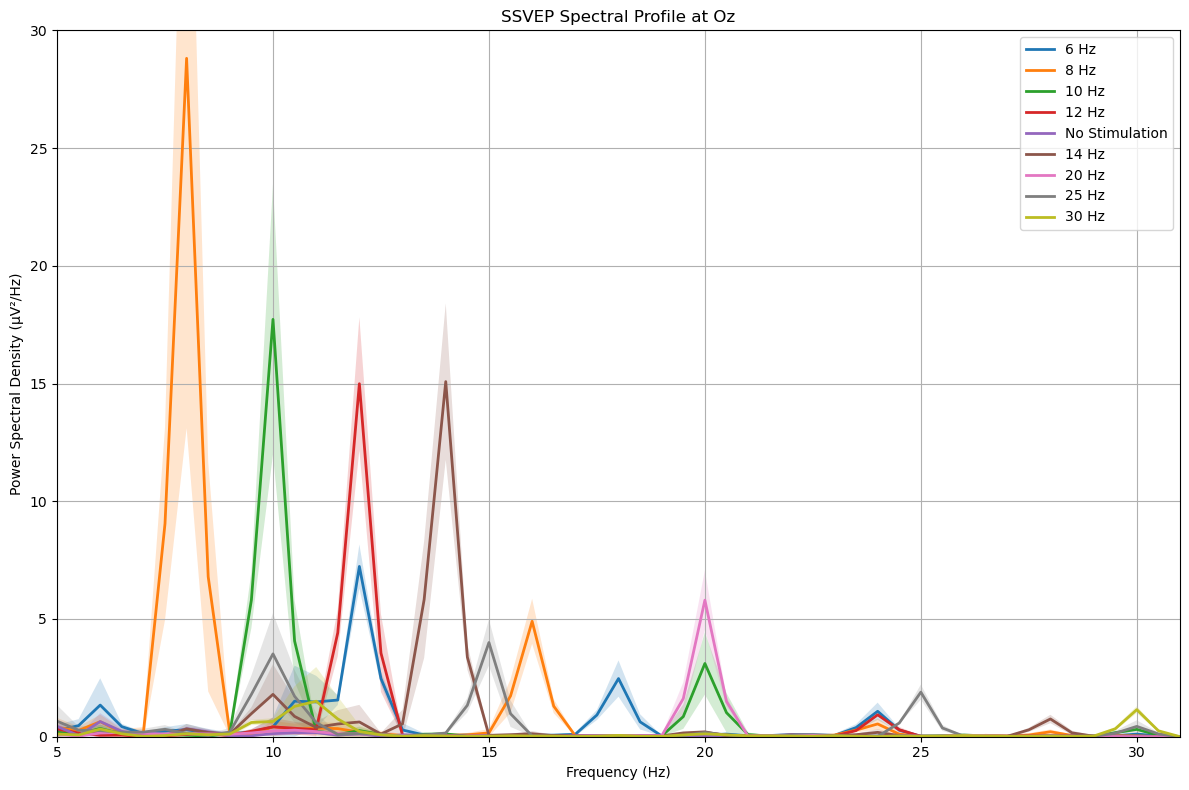

In [182]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List
import mne

def create_manual_mapping() -> Dict[str, str]:
    """
    Create a direct trigger-to-label mapping.

    Returns:
    - manual_mapping (Dict[str, str]): Mapping of trigger codes to labels.
    """
    manual_mapping = {
        '1': '6 Hz',
        '2': '8 Hz',
        '3': '10 Hz',
        '4': '12 Hz',
        '5': 'No Stimulation',
        '6': '14 Hz',
        '7': '20 Hz',
        '8': '25 Hz',
        '9': '30 Hz'
    }
    return manual_mapping

def perform_spectral_analysis(epochs: mne.Epochs, manual_mapping: Dict[str, str],
                             channel: str, fs: int =250, window: str='hann',
                             nperseg: int=500, noverlap: int=250, nfft: int=500,
                             freq_limit: float=31.0) -> Dict[str, Dict[str, np.ndarray]]:
    """
    Perform spectral analysis on the specified channel for each event type.

    Parameters:
    - epochs (mne.Epochs): The EEG epochs containing the data.
    - manual_mapping (Dict[str, str]): Mapping of trigger codes to labels.
    - channel (str): Channel name to perform spectral analysis on.
    - fs (int): Sampling frequency.
    - window (str): Window function.
    - nperseg (int): Length of each segment.
    - noverlap (int): Number of points to overlap between segments.
    - nfft (int): Number of FFT points.
    - freq_limit (float): Maximum frequency to plot.

    Returns:
    - spectral_data (Dict[str, Dict[str, np.ndarray]]): Spectral data for each event.
    """
    channel_names = [name.upper() for name in epochs.info['ch_names']]
    try:
        channel_idx = channel_names.index(channel.upper())
    except ValueError:
        print(f"Channel {channel} not found in data.")
        raise

    spectral_data = {}

    for trigger, label in manual_mapping.items():
        data = epochs[trigger].get_data() * 1e6  # Convert to µV
        channel_data = data[:, channel_idx, :]

        # Compute spectrogram
        f, _, P = signal.spectrogram(np.mean(channel_data, axis=0),
                                     fs=fs,
                                     window=window,
                                     nperseg=nperseg,
                                     noverlap=noverlap,
                                     nfft=nfft,
                                     mode='psd')

        # Average and std across time windows
        avgP = np.mean(P, axis=1)
        stdP = np.std(P, axis=1)

        # Apply frequency mask
        freq_mask = f <= freq_limit
        spectral_data[label] = {
            'freqs': f[freq_mask],
            'avgP': avgP[freq_mask],
            'stdP': stdP[freq_mask]
        }

    return spectral_data

def plot_spectral_profiles(spectral_data: Dict[str, Dict[str, np.ndarray]],
                           xlim: List[float] = [5, 31],
                           ylim: List[float] = [0, 30],
                           title: str = 'SSVEP Spectral Profile at Oz') -> None:
    """
    Plot the spectral profiles for each event type.

    Parameters:
    - spectral_data (Dict[str, Dict[str, np.ndarray]]): Spectral data for each event.
    - xlim (List[float], optional): Frequency range for x-axis. Defaults to [5, 31].
    - ylim (List[float], optional): Power range for y-axis. Defaults to [0, 30].
    - title (str, optional): Title of the plot. Defaults to 'SSVEP Spectral Profile at Oz'.
    """
    plt.figure(figsize=(12, 8))

    for label, data in spectral_data.items():
        freqs = data['freqs']
        avgP = data['avgP']
        stdP = data['stdP']

        plt.plot(freqs, avgP, linewidth=2, label=label)
        plt.fill_between(freqs, avgP - stdP, avgP + stdP, alpha=0.2)

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.grid(True)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (µV²/Hz)')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Create manual mapping
manual_mapping = create_manual_mapping()

# Perform spectral analysis on Oz channel
spectral_data = perform_spectral_analysis(epochs, manual_mapping, channel='OZ')

# Plot spectral profiles
plot_spectral_profiles(spectral_data)


### Topographic Analysis of SSVEP Responses

In this part, we extend the spectral analysis to all channels. The results are based on averaged data over each stimulation frequency and are normalized using the global minimum and maximum values (min-max normalization).

As expected, there is a strong response in the occipital area only for the stimulation of the same frequency. As shown in the previous section, the response at 12 Hz for 6 Hz stimulation is the strongest. Interestingly, there is a stronger response in the O2 channel at 10 Hz for 20 Hz stimulation, which prompts a further check of the Signal-to-Noise Ratio (SNR) for all frequencies across all occipital channels.


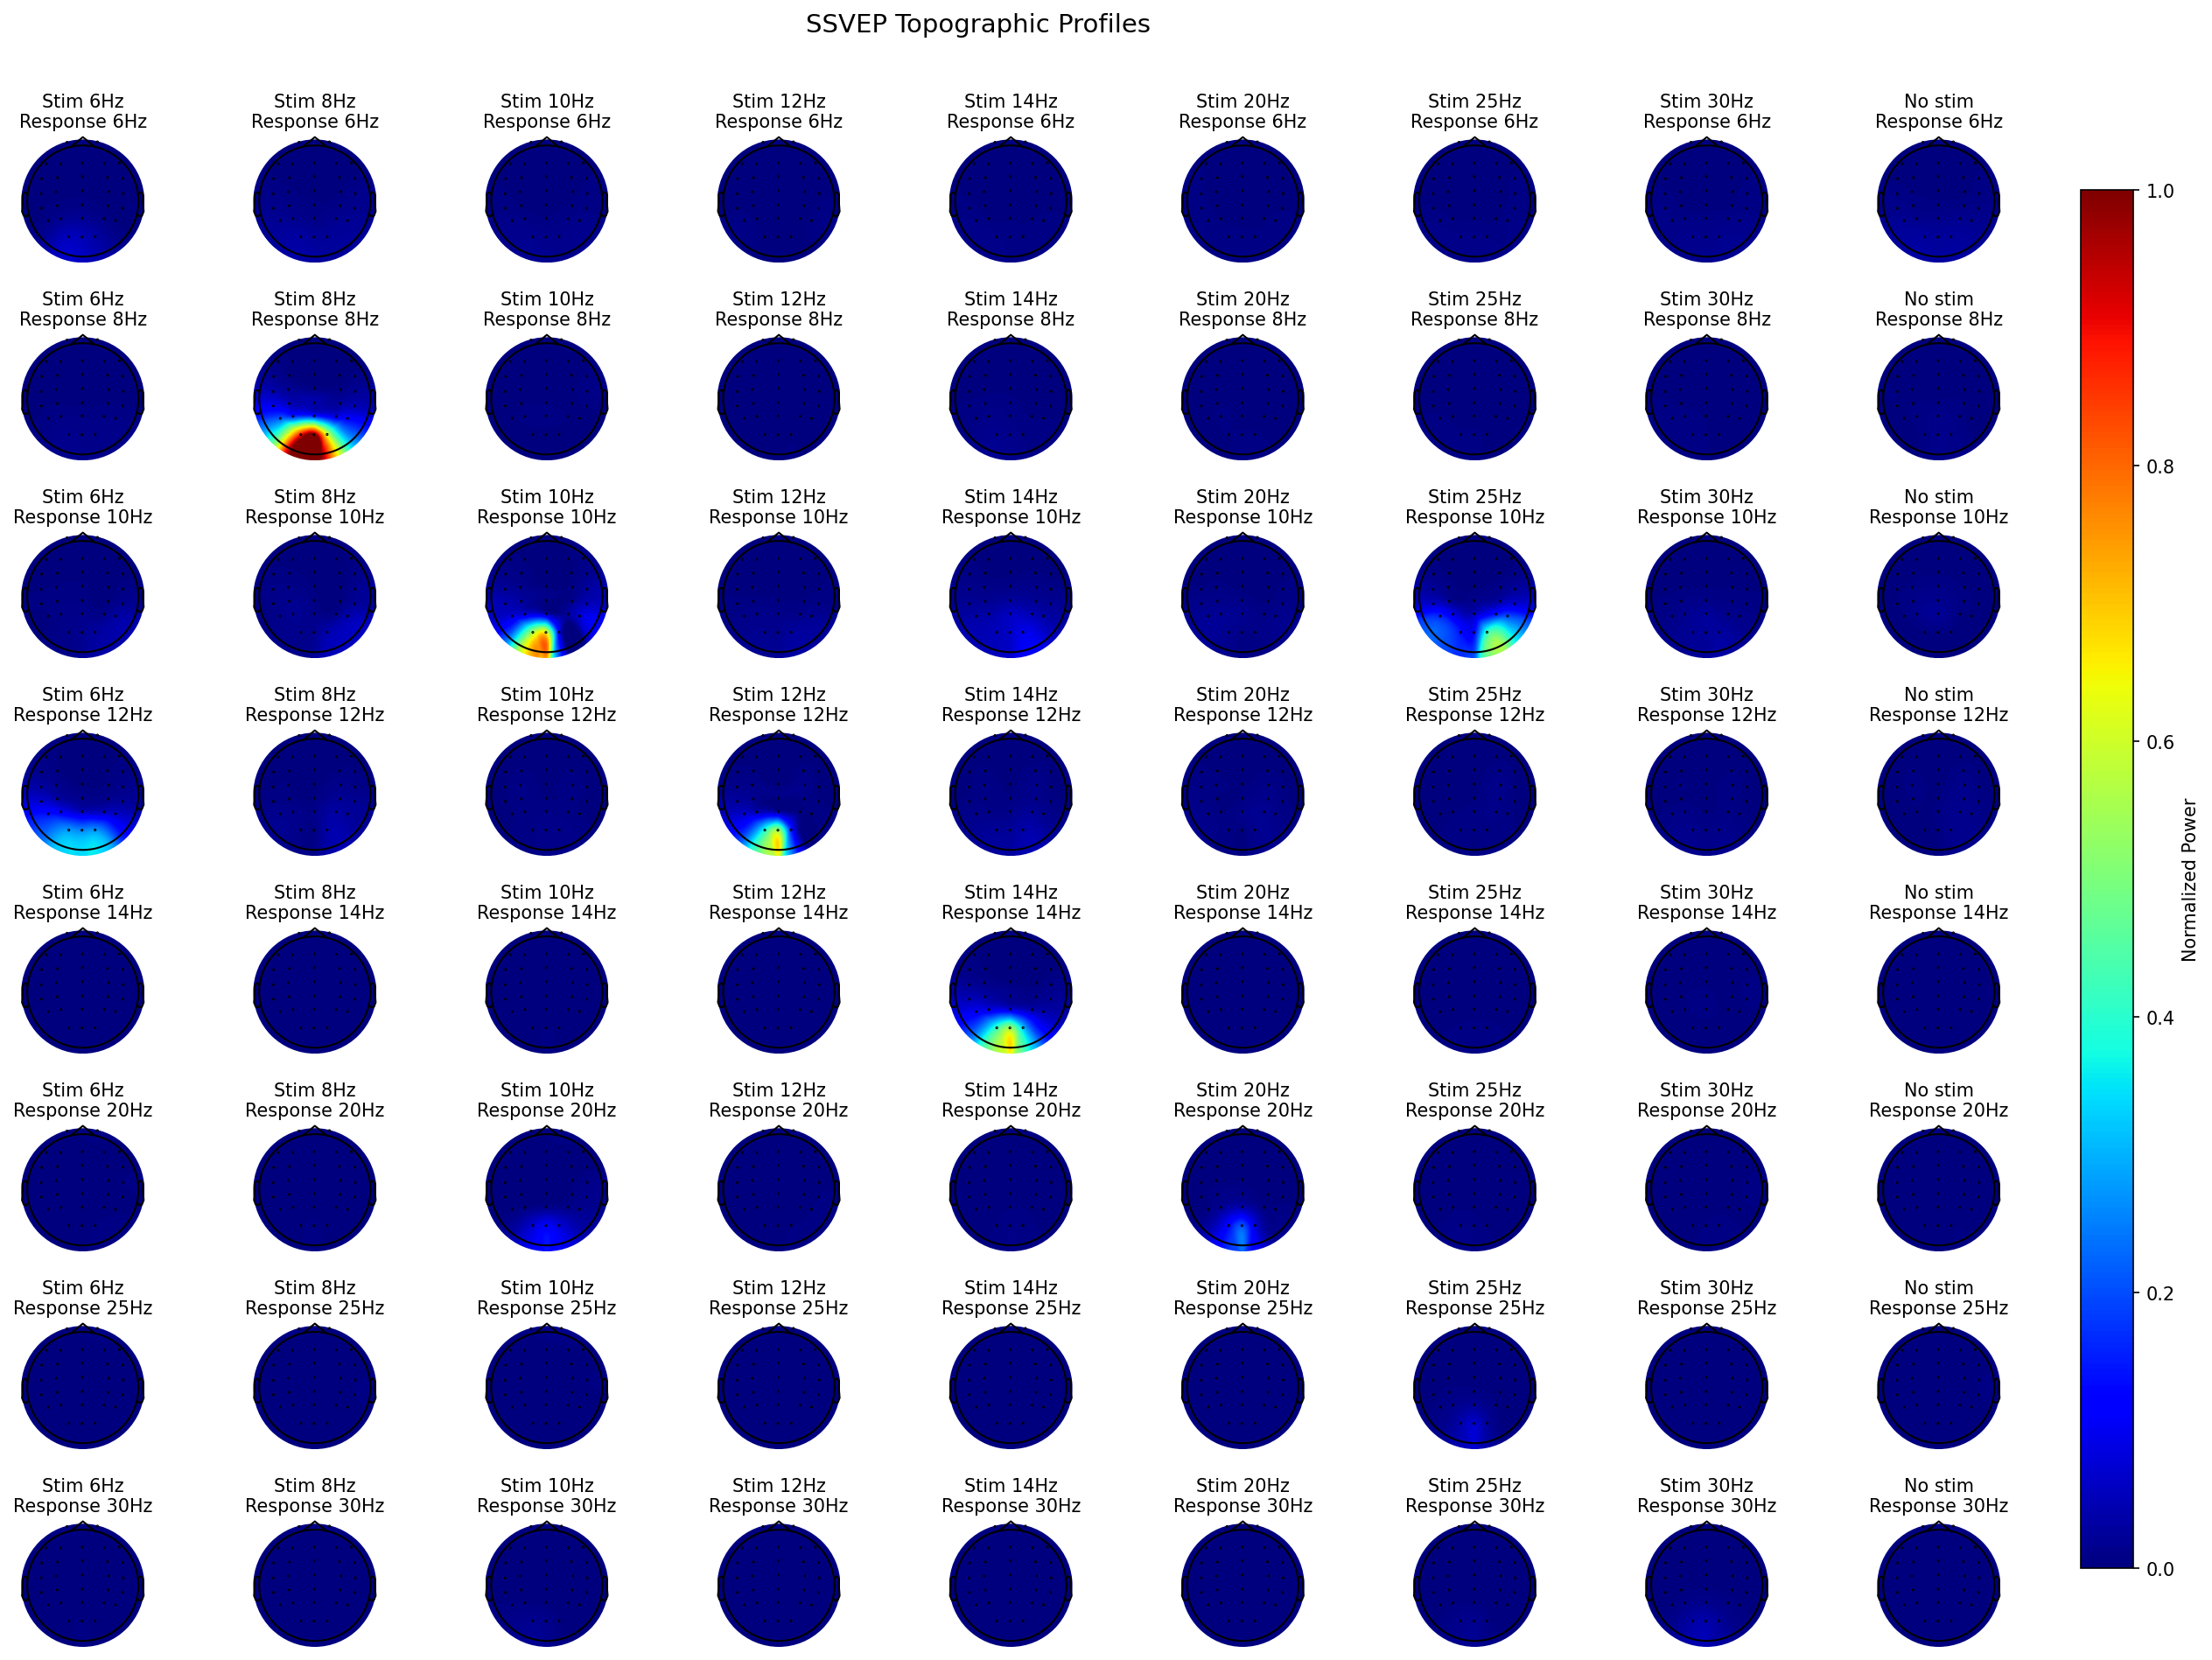

In [171]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from typing import Dict, List
import mne

def create_frequency_mapping(manual_mapping: Dict[str, str]) -> Dict[str, int]:
    """
    Create frequency order and mapping based on manual event mapping.
    
    Parameters:
    - manual_mapping (Dict[str, str]): Mapping of trigger codes to labels.
    
    Returns:
    - frequency_order (List[str]): Ordered list of frequency labels.
    - stim_freqs (List[int]): List of stimulation frequencies.
    - response_freqs (List[int]): List of response frequencies to analyze.
    """
    frequency_order = ['6 Hz', '8 Hz', '10 Hz', '12 Hz', '14 Hz', '20 Hz', '25 Hz', '30 Hz', 'No Stimulation']
    stim_freqs = [6, 8, 10, 12, 14, 20, 25, 30, 0]  # Actual stimulation frequencies
    response_freqs = [6, 8, 10, 12, 14, 20, 25, 30]  # Frequencies to show in responses
    return frequency_order, stim_freqs, response_freqs

def compute_topographic_power(epochs: mne.Epochs, manual_mapping: Dict[str, str],
                             frequency_order: List[str], fs: int =250,
                             window: str='hann', nperseg: int=500,
                             noverlap: int=250, nfft: int=500) -> np.ndarray:
    """
    Compute the power spectral density for each stimulation condition and channel.
    
    Parameters:
    - epochs (mne.Epochs): The EEG epochs containing the data.
    - manual_mapping (Dict[str, str]): Mapping of trigger codes to labels.
    - frequency_order (List[str]): Ordered list of frequency labels.
    - fs (int): Sampling frequency.
    - window (str): Window function for spectrogram.
    - nperseg (int): Length of each segment.
    - noverlap (int): Number of points to overlap between segments.
    - nfft (int): Number of FFT points.
    
    Returns:
    - topoP (np.ndarray): Power matrix (stimuli × channels × frequency bins).
    - f (np.ndarray): Array of sample frequencies.
    """
    num_stim = len(frequency_order)
    num_channels = len(epochs.ch_names)
    topoP = np.zeros((num_stim, num_channels, 251))  # Assuming 251 frequency bins
    
    for stim_idx, freq_label in enumerate(frequency_order):
        try:
            trigger = str([k for k, v in manual_mapping.items() if v == freq_label][0])
        except IndexError:
            print(f"Frequency label '{freq_label}' not found in manual mapping.")
            raise
        
        data = epochs[trigger].get_data() * 1e6  # Convert to µV
        
        for ch_idx in range(num_channels):
            # Average epochs first
            averaged_data = np.mean(data[:, ch_idx, :], axis=0)
            
            # Compute PSD
            f, _, P = signal.spectrogram(averaged_data, fs=fs, 
                                        window=window, nperseg=nperseg,
                                        noverlap=noverlap, nfft=nfft,
                                        mode='psd')
            topoP[stim_idx, ch_idx, :] = np.mean(P, axis=1)
    
    return topoP, f

def normalize_power_matrix(topoP: np.ndarray) -> np.ndarray:
    """
    Normalize the power matrix using global min-max normalization.
    
    Parameters:
    - topoP (np.ndarray): Power matrix (stimuli × channels × frequency bins).
    
    Returns:
    - norTopoP (np.ndarray): Normalized power matrix.
    """
    global_min = np.min(topoP)
    global_max = np.max(topoP)
    norTopoP = (topoP - global_min) / (global_max - global_min)
    return norTopoP

def plot_topographic_profiles(norTopoP: np.ndarray, epochs: mne.Epochs,
                             frequency_order: List[str], stim_freqs: List[int],
                             response_freqs: List[int], f: np.ndarray,
                             cmap: str = 'jet') -> None:
    """
    Plot the topographic profiles for each response frequency and stimulation frequency.
    
    Parameters:
    - norTopoP (np.ndarray): Normalized power matrix.
    - epochs (mne.Epochs): The EEG epochs containing channel information.
    - frequency_order (List[str]): Ordered list of frequency labels.
    - stim_freqs (List[int]): List of stimulation frequencies.
    - response_freqs (List[int]): List of response frequencies to plot.
    - f (np.ndarray): Array of sample frequencies.
    - cmap (str): Colormap for topomap.
    """
    num_stim = len(stim_freqs)
    num_resp = len(response_freqs)
    
    fig, axes = plt.subplots(nrows=num_resp, ncols=num_stim, 
                            figsize=(20, 15), dpi=150)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
    for stim_idx, stim_freq in enumerate(stim_freqs):
        for resp_idx, resp_freq in enumerate(response_freqs):
            # Find frequency bin closest to the desired response frequency
            freq_bin = np.argmin(np.abs(f - resp_freq))
            
            # Plot with fixed global limits
            mne.viz.plot_topomap(norTopoP[stim_idx, :, freq_bin], epochs.info,
                                vlim=(0, 1),
                                axes=axes[resp_idx, stim_idx],
                                cmap=cmap, 
                                show=False,
                                contours=False)
            
            # Add titles
            if stim_freq == 0:
                title = f'No stim\nResponse {resp_freq}Hz'
            else:
                title = f'Stim {stim_freq}Hz\nResponse {resp_freq}Hz'
            axes[resp_idx, stim_idx].set_title(title, fontsize=10, pad=1)
    
    # Add unified colorbar
    cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(0, 1))
    sm.set_array([])
    plt.colorbar(sm, cax=cax).set_label('Normalized Power')
    
    plt.suptitle('SSVEP Topographic Profiles', y=0.94, fontsize=14)
    plt.show()

# Create frequency mapping
frequency_order, stim_freqs, response_freqs = create_frequency_mapping(manual_mapping)

# Compute topographic power
topoP, f = compute_topographic_power(epochs, manual_mapping, frequency_order)

# Normalize power matrix
norTopoP = normalize_power_matrix(topoP)

# Plot topographic profiles
plot_topographic_profiles(norTopoP, epochs, frequency_order, stim_freqs, response_freqs, f)


### Signal-to-Noise Ratio (SNR) Analysis

We compare the SNR across all frequencies for each stimulation frequency in the occipital channels and **Fz**. This analysis demonstrates that the SNR is lower for **Fz** at the target frequencies. Additionally, it confirms that the most responsive frequencies to analyze are the target frequency and its harmonics.


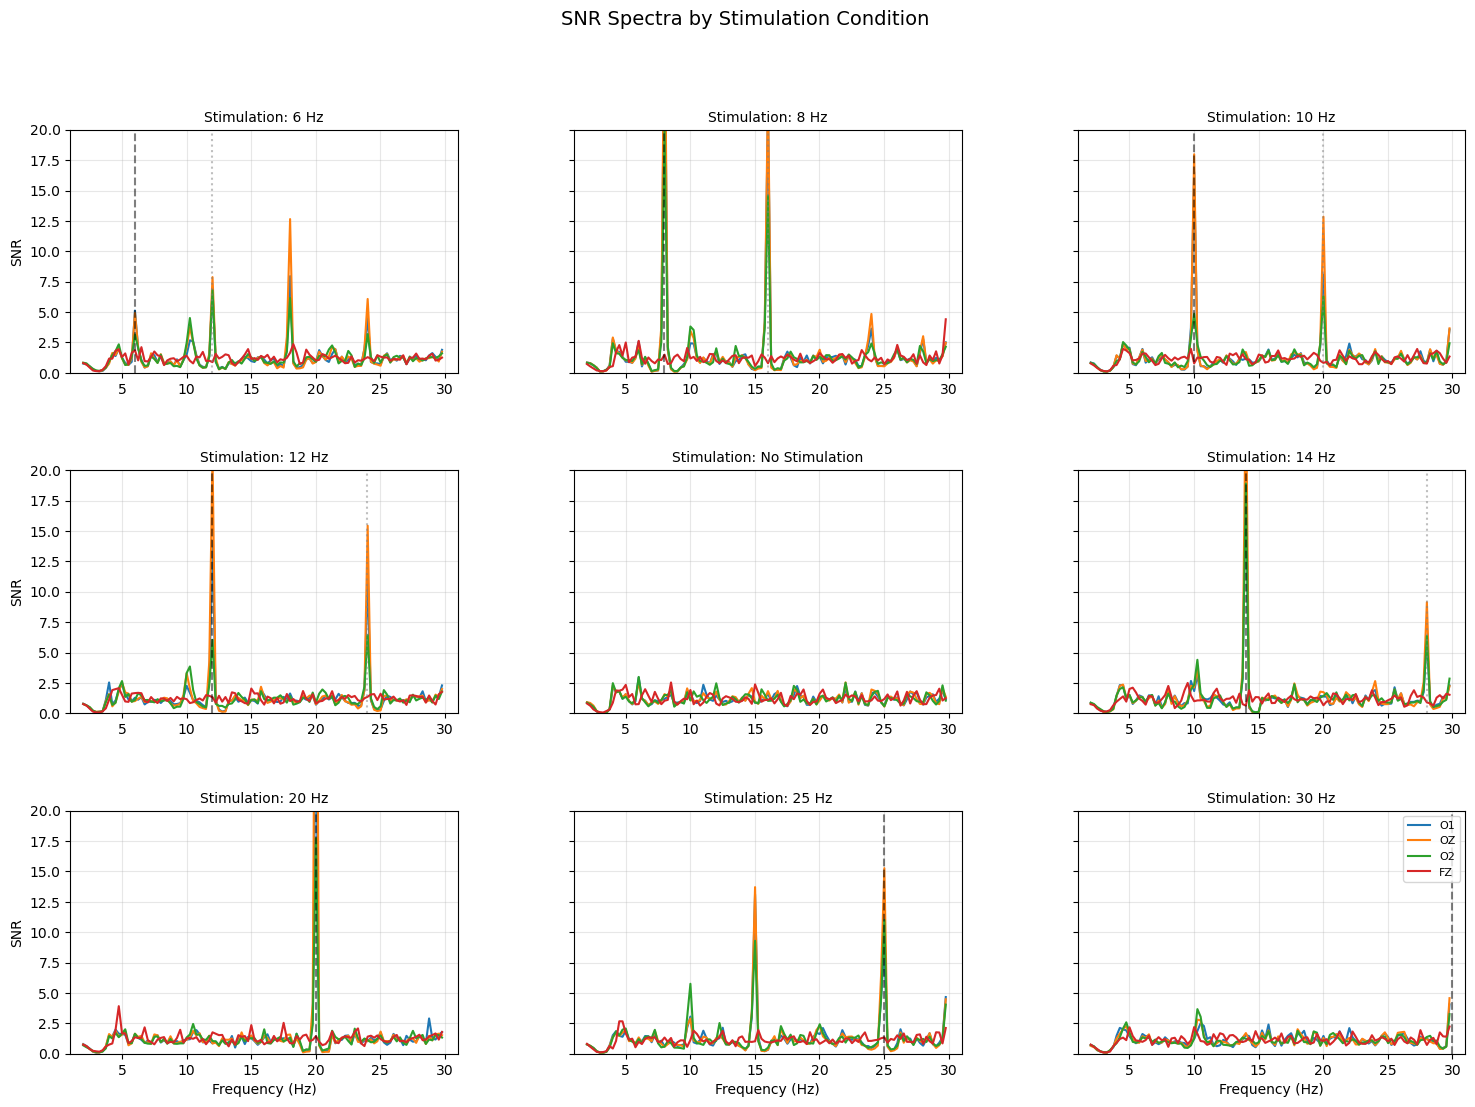

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from scipy import signal
from typing import List, Dict
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


def compute_psd_epochs(epochs: mne.Epochs, tmin: float, tmax: float,
                      fmin: float, fmax: float, fs: int =250,
                      window: str='boxcar'):
    """
    Compute Power Spectral Density (PSD) using Welch's method for the given epochs.
    
    Parameters:
    - epochs (mne.Epochs): The EEG epochs containing the data.
    - tmin (float): Start time for PSD computation.
    - tmax (float): End time for PSD computation.
    - fmin (float): Minimum frequency for PSD.
    - fmax (float): Maximum frequency for PSD.
    - fs (int, optional): Sampling frequency. Defaults to 250.
    - window (str, optional): Window type for Welch's method. Defaults to 'boxcar'.
    
    Returns:
    - PSD results.
    """
    spectrum = epochs.compute_psd(
        method='welch',
        n_fft=int(fs * (tmax - tmin)),
        n_overlap=0,
        n_per_seg=None,
        tmin=tmin,
        tmax=tmax,
        fmin=fmin,
        fmax=fmax,
        window=window,
        verbose=False
    )
    return spectrum

def snr_spectrum(psd: np.ndarray, noise_n_neighbor_freqs: int =3,
                noise_skip_neighbor_freqs: int =1) -> np.ndarray:
    """
    Compute Signal-to-Noise Ratio (SNR) spectrum with proper padding.
    
    Parameters:
    - psd (np.ndarray): Power Spectral Density data.
    - noise_n_neighbor_freqs (int, optional): Number of neighboring frequencies for noise. Defaults to 3.
    - noise_skip_neighbor_freqs (int, optional): Number of frequencies to skip. Defaults to 1.
    
    Returns:
    - snr (np.ndarray): Computed SNR spectrum.
    """
    # Create averaging kernel
    n_neighbors = noise_n_neighbor_freqs
    n_skip = noise_skip_neighbor_freqs
    kernel = np.concatenate((
        np.ones(n_neighbors),
        np.zeros(2 * n_skip + 1),
        np.ones(n_neighbors)
    ))
    kernel /= kernel.sum()

    # Calculate mean noise
    mean_noise = np.apply_along_axis(
        lambda x: np.convolve(x, kernel, mode='valid'),
        axis=-1, arr=psd
    )

    # Calculate padding
    edge_width = n_neighbors + n_skip
    pad_width = [(0, 0)] * (mean_noise.ndim - 1) + [(edge_width, edge_width)]
    
    # Pad with NaNs
    mean_noise = np.pad(
        mean_noise, 
        pad_width=pad_width,
        mode='constant',
        constant_values=np.nan
    )

    return psd / mean_noise

def plot_snr_spectra(epochs: mne.Epochs, spectrum, event_dict: Dict[str, int],
                    channels_of_interest: List[str], colors: List[str],
                    fmin: float, fmax: float, tmin: float, tmax: float) -> None:
    """
    Plot SNR spectra for each stimulation condition and specified channels.
    
    Parameters:
    - epochs (mne.Epochs): The EEG epochs containing the data.
    - spectrum: PSD results from compute_psd_epochs.
    - event_dict (Dict[str, int]): Mapping of event names to event IDs.
    - channels_of_interest (List[str]): List of channel names to analyze.
    - colors (List[str]): List of colors for plotting each channel.
    - fmin (float): Minimum frequency for plotting.
    - fmax (float): Maximum frequency for plotting.
    - tmin (float): Start time for epochs.
    - tmax (float): End time for epochs.
    """
    psds, freqs = spectrum.get_data(return_freqs=True)
    
    fig, axes = plt.subplots(3, 3, figsize=(18, 12))
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    axes = axes.flatten()
    
    # Get channel indices
    channel_indices = []
    for ch in channels_of_interest:
        try:
            idx = epochs.ch_names.index(ch.upper())
            channel_indices.append(idx)
        except ValueError:
            print(f"Channel {ch} not found in data.")
            raise
    
    # Process each stimulation condition
    for ax_idx, (event_name, event_id) in enumerate(event_dict.items()):
        # Select epochs for this event
        event_mask = epochs.events[:, 2] == event_id
        event_psds = psds[event_mask]
        
        # Calculate SNR for each channel
        snr_results = []
        for ch_idx in channel_indices:
            ch_psds = event_psds[:, ch_idx, :]
            ch_snr = snr_spectrum(ch_psds)
            snr_mean = np.nanmean(ch_snr, axis=0)  # Average across trials
            snr_results.append(snr_mean)
        
        # Plotting
        ax = axes[ax_idx]
        freq_mask = (freqs >= fmin) & (freqs <= fmax)
        plot_freqs = freqs[freq_mask]
        
        for color, ch_name, snr in zip(colors, channels_of_interest, snr_results):
            ax.plot(plot_freqs, snr[freq_mask], color=color, linewidth=1.5, label=ch_name)
        
        # Add stimulation frequency marker if applicable
        if 'Hz' in event_name:
            stim_freq = int(event_name.split()[0])
            ax.axvline(stim_freq, color='black', linestyle='--', alpha=0.5)
            ax.axvline(2*stim_freq, color='gray', linestyle=':', alpha=0.5)  # 2nd harmonic
        
        # Format subplot
        ax.set_title(f'Stimulation: {event_name}', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.set_xlim(fmin, fmax)
        ax.set_ylim(0, 20)
        
        # Only show labels on bottom row and leftmost column
        if ax_idx >= 6:
            ax.set_xlabel('Frequency (Hz)')
        if ax_idx % 3 == 0:
            ax.set_ylabel('SNR')
        else:
            ax.set_yticklabels([])
    
    # Add legend to last subplot
    axes[-1].legend(loc='upper right', fontsize=8)
    
    # Add overall title
    plt.suptitle('SNR Spectra by Stimulation Condition', y=0.98, fontsize=14)
    plt.show()

# Configuration
channels_of_interest = ['O1', 'OZ', 'O2', 'FZ']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # O1, Oz, O2, Fz
fmin, fmax = 1.0, 31.0  # Limited to 31 Hz
tmin, tmax = 0.0, 3.996  # Full epoch length

# Define all 9 events with their frequencies (include 'No Stimulation')
event_dict = {
    '6 Hz': 3, '8 Hz': 9, '10 Hz': 8,
    '12 Hz': 5, 'No Stimulation': 7, '14 Hz': 6,
    '20 Hz': 1, '25 Hz': 4, '30 Hz': 2
}
stim_freqs = list(event_dict.values())

# Compute PSD using Welch's method
spectrum = compute_psd_epochs(epochs, tmin, tmax, fmin, fmax)

# Plot SNR spectra
plot_snr_spectra(epochs, spectrum, event_dict, channels_of_interest, colors, fmin, fmax, tmin, tmax)


### Conclusion

In this project, we conducted a comprehensive analysis of Steady-State Visually Evoked Potentials (SSVEP) using EEG data collected from a single subject. The analysis encompassed several key steps:

1. **Data Loading and Preprocessing:**  
   We began by loading the EEG data using MNE-Python, setting up the appropriate electrode montage, and verifying the data structure to ensure its integrity for subsequent analyses.

2. **Visual Inspection of Average EEG Profiles:**  
   Before diving into quantitative measures, we visually inspected the average EEG profiles for each stimulation frequency. Focusing on the **Oz** and **Fz** channels, we observed clear periodic patterns in the occipital region (**Oz**) corresponding to the stimulation frequencies, while the frontal region (**Fz**) did not exhibit such structures, aligning with expectations from existing literature.

3. **Spectral Analysis of SSVEP Responses:**  
   Utilizing Welch's method, we performed spectral analysis to examine the Power Spectral Density (PSD) of the EEG signals. The results revealed prominent peaks at the stimulation frequencies and their harmonics, particularly in the occipital channels. Notably, the strongest responses were observed for stimulation frequencies of 8 Hz, 10 Hz, 12 Hz, and 14 Hz. Additionally, for 6 Hz stimulation, significant responses were detected at its second (12 Hz) and third (18 Hz) harmonics, as well as a comparable response at the fourth (24 Hz) harmonic.

4. **Topographic Analysis of SSVEP Responses:**  
   Extending the spectral analysis to all EEG channels, we generated topographic maps to visualize the spatial distribution of spectral power across the scalp. The topographic profiles confirmed strong responses in the occipital areas corresponding to the stimulation frequencies. An intriguing finding was the enhanced response in the **O2** channel at 10 Hz during 20 Hz stimulation, suggesting potential areas for further investigation into Signal-to-Noise Ratio (SNR) across all occipital channels.

5. **Signal-to-Noise Ratio (SNR) Analysis:**  
   We compared the SNR across all frequencies for each stimulation condition in the occipital channels and **Fz**. The analysis demonstrated lower SNR values in **Fz** at the target frequencies, reinforcing the specificity of occipital regions in generating reliable SSVEP responses. This underscores the importance of focusing on spectral features from occipital sources for effective SSVEP classification.

Overall, this analysis illustrates that spectral features extracted from the occipital region are robust and can serve as a reliable foundation for developing classification strategies in SSVEP-based applications, such as Brain-Computer Interfaces (BCIs). The clear differentiation between occipital and frontal responses highlights the potential for targeted feature extraction, enhancing the accuracy and reliability of SSVEP classification models.
